# Fibonacci Retracement in Python | Support & Resistance Levels with Real Stock Data (Step-by-Step)

## Section 1 — imports & warnings

In [1]:
#pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Section 2 — download price data 

In [3]:
ticker = "AAPL" 
data = yf.download(ticker, start="2024-01-01", end="2024-09-01", 
                   progress = False, group_by="column")

## Section 3 — pick a recent window 

In [6]:
window = data.tail(120)
if window.empty: 
    raise ValueError("No data retured. Check ticker/date range.")

## Section 4 — safely extract 1-D series 

In [8]:
def get_1d(df, name):
    if name in df.columns: 
        s = df[name]
    else: 
        s = df.xs(name, axis=1, level=0)
    if isinstance(s, pd.DataFrame):
        s = s.squeeze()
    return s 

close = get_1d(window, "Close")
high = get_1d(window, "High")
lows = get_1d(window, "Low")

## Section 5 — compute fibonacci retracement levels 

In [9]:
high = float(high.max())
low = float(lows.min())

ratios = [0.236, 0.382, 0.5, 0.618, 0.786]
diff = high - low
levels = [high - diff * r for r in ratios]

## Section 6 — plot price + fibonacci lines

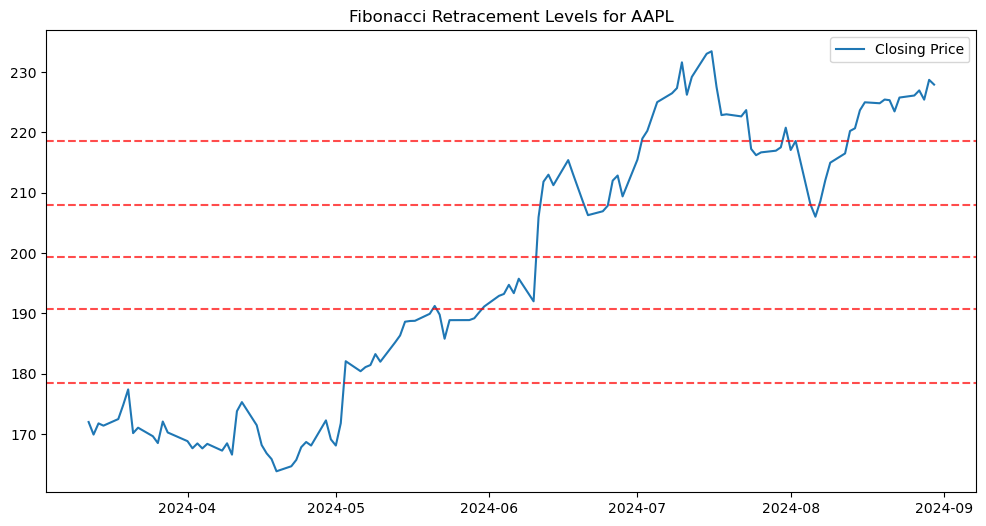

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(close.index, close.values, label="Closing Price")

for lvl in levels: 
    ax. axhline(y=float(lvl), linestyle='--', alpha=0.7, color='red')

ax.set_title(f"Fibonacci Retracement Levels for {ticker}")
ax.legend()
plt.show()
